In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

c:\python\lib\site-packages\pandas\compat\_optional.py:106: UserWarning: Pandas requires version '1.2.1' or newer of 'bottleneck' (version '0+unknown' currently installed).
  warnings.warn(msg, UserWarning)


In [30]:
df = pd.read_csv('Breast_cancer_data.csv')

In [7]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [5]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


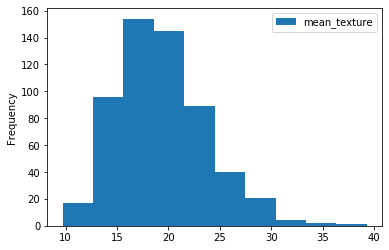

In [8]:
df.plot('mean_radius', 'mean_texture', kind='hist')

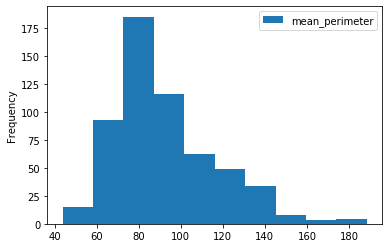

In [9]:
df.plot('mean_radius', 'mean_perimeter', kind='hist')

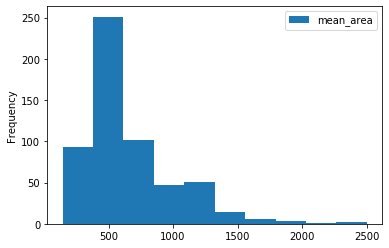

In [10]:
df.plot('mean_radius', 'mean_area', kind='hist')

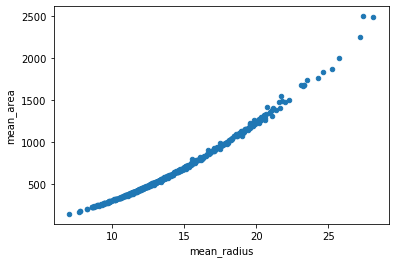

In [11]:
df.plot('mean_radius', 'mean_area', kind='scatter')

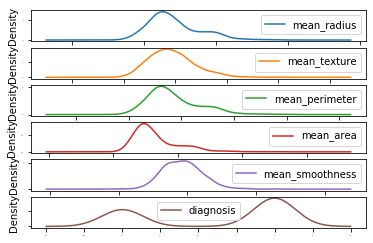

In [57]:
df.plot(kind='density', subplots=True, sharex=False, legend=True, fontsize=1)
plt.show()

In [39]:
# import seaborn as sns
# ax = sns.heatmap(df, vmin=0, vmax=1)

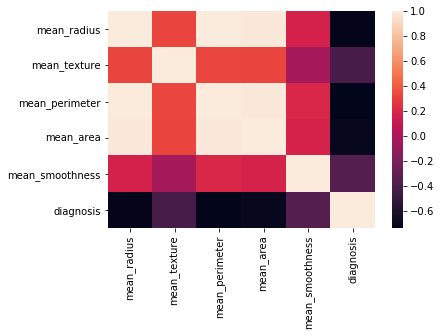

In [17]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns,
        yticklabels=corr.columns)

In [19]:
df = df.drop('mean_perimeter',axis=1)

In [21]:
df

,mean_radius,mean_texture,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,1001.0,0.11840,0
1,20.57,17.77,1326.0,0.08474,0
2,19.69,21.25,1203.0,0.10960,0
3,11.42,20.38,386.1,0.14250,0
4,20.29,14.34,1297.0,0.10030,0
...,...,...,...,...,...
564,21.56,22.39,1479.0,0.11100,0
565,20.13,28.25,1261.0,0.09780,0
566,16.60,28.08,858.1,0.08455,0
567,20.60,29.33,1265.0,0.11780,0


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
        train_test_split(df[['mean_radius', 'mean_texture', 'mean_area','mean_smoothness']], df['diagnosis'], test_size=.2, random_state=42)

In [32]:
from sklearn.preprocessing import StandardScaler
x_train = StandardScaler().fit_transform(X_train)
x_test = StandardScaler().fit_transform(X_test)

In [33]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42).fit(x_test, y_test)

In [34]:
clf

LogisticRegression()

In [35]:
clf.score(x_test, y_test)

0.956140350877193

In [37]:
y_pred = clf.predict(x_test)

In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[39,  4],
       [ 1, 70]], dtype=int64)

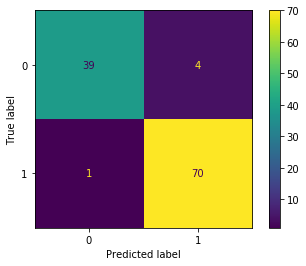

In [40]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, x_test, y_test)
plt.show()

In [46]:
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(cv=5, random_state=42).fit(x_train, y_train)
clf.score(x_test, y_test)

0.9649122807017544

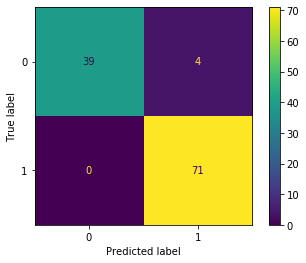

In [47]:
plot_confusion_matrix(clf, x_test, y_test)
plt.show()

In [48]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(x_test, y_test)

GaussianNB()

In [49]:
clf.score(x_test, y_test)

0.9210526315789473

In [60]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(x_test, y_test)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [61]:
clf.score(x_test, y_test)

0.9649122807017544

In [62]:
clf = SVC(C=2.0, kernel='rbf')
clf.fit(x_test, y_test)

SVC(C=2.0)

In [63]:
clf.score(x_test, y_test)

0.9649122807017544